In [1]:
# Mount google drive to load the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Import required packages to load the data
import pandas as pd

# Save the filepath and load the data as "df"
fpath = "/content/drive/MyDrive/CodingDojo/05-IntermediateML/Week17/Data/cirrhosis.csv"
df = pd.read_csv(fpath)

In [7]:
#read the data
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [8]:
# get structure of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

### Building the Neural Network

In [10]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.3 MB/s eta 0:00:00


Epoch 1/50
9/9 [==============================] - 2s 44ms/step - loss: nan - accuracy: 0.5543 - val_loss: nan - val_accuracy: 0.5224
Epoch 2/50
9/9 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.5730 - val_loss: nan - val_accuracy: 0.5224
Epoch 3/50
9/9 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.5730 - val_loss: nan - val_accuracy: 0.5224
Epoch 4/50
9/9 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.5730 - val_loss: nan - val_accuracy: 0.5224
Epoch 5/50
9/9 [==============================] - 0s 10ms/step - loss: nan - accuracy: 0.5730 - val_loss: nan - val_accuracy: 0.5224
Epoch 6/50
9/9 [==============================] - 0s 10ms/step - loss: nan - accuracy: 0.5730 - val_loss: nan - val_accuracy: 0.5224


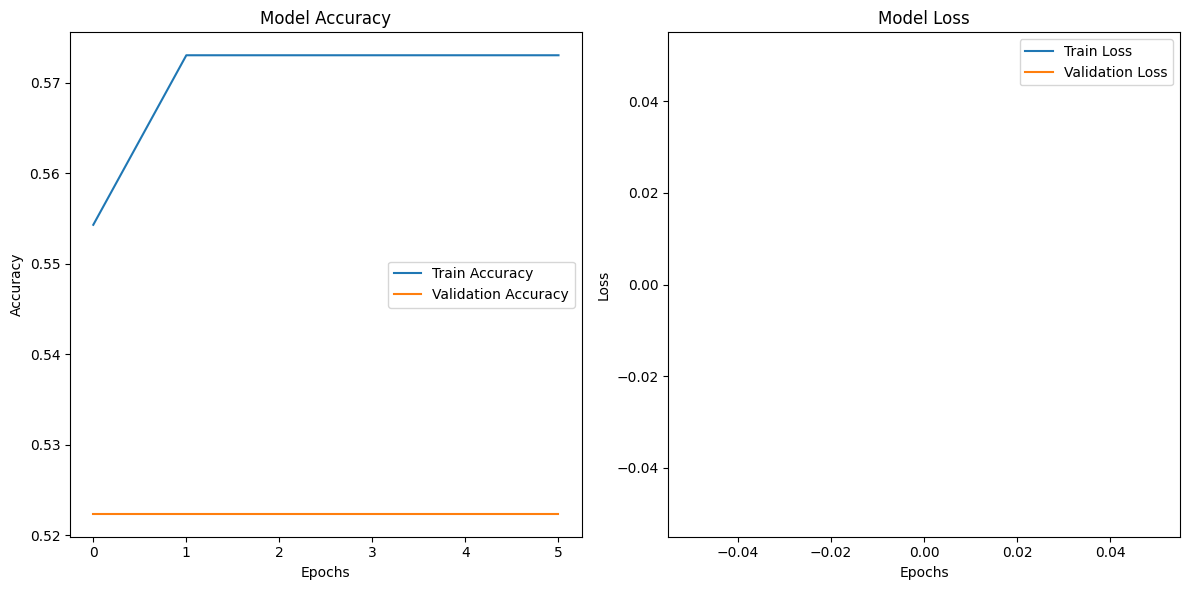

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
import keras_tuner as kt

# Assuming 'Status' is the target column and it is a binary classification problem
# Load and preprocess the data
X = df.drop('Status', axis=1)
y = df['Status']

# Convert categorical features to numeric using one-hot encoding
X = pd.get_dummies(X)

# Convert all features to float32
X = X.astype(np.float32)

# Encode target variable if it's not numeric (e.g., 'Yes'/'No' to 1/0)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Convert target to float32
y = y.astype(np.float32)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the initial model
def build_model():
    model = Sequential()
    model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))  # For binary classification
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = build_model()

# Define Early Stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Fit the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    callbacks=[early_stopping]
)

# Plot the training history
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()





### Evaluate the Model

In [15]:
# Evaluate the model on the test data
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(cm)

# Classification Report
cr = classification_report(y_test, y_pred)
print('Classification Report')
print(cr)


3/3 [==============================] - 0s 4ms/step
Confusion Matrix
[[44  0  0]
 [ 4  0  0]
 [36  0  0]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.52      1.00      0.69        44
         1.0       0.00      0.00      0.00         4
         2.0       0.00      0.00      0.00        36

    accuracy                           0.52        84
   macro avg       0.17      0.33      0.23        84
weighted avg       0.27      0.52      0.36        84



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Tuning the Model with Keras Tuner

In [16]:
def build_tuner_model(hp):
    model = Sequential()
    model.add(Dense(hp.Int('units', min_value=8, max_value=32, step=8), input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(hp.Float('dropout_rate', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(1, activation='sigmoid'))

    optimizer = hp.Choice('optimizer', values=['adam', 'rmsprop'])
    learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    if optimizer == 'adam':
        opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    else:
        opt = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)

    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

tuner = kt.RandomSearch(
    build_tuner_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='my_dir',
    project_name='tuner')

tuner.search(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[early_stopping])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
The hyperparameter search is complete. The optimal number of units in the hidden layer is {best_hps.get('units')}.
The optimal dropout rate is {best_hps.get('dropout_rate')}.
The optimal optimizer is {best_hps.get('optimizer')} with a learning rate of {best_hps.get('learning_rate')}.
""")

# Build the model with the optimal hyperparameters and train it
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, callbacks=[early_stopping])

# Evaluate the model on the test data
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(cm)

# Classification Report
cr = classification_report(y_test, y_pred)
print('Classification Report')
print(cr)


Trial 5 Complete [00h 00m 02s]
val_accuracy: 0.5223880410194397

Best val_accuracy So Far: 0.5223880410194397
Total elapsed time: 00h 00m 10s

The hyperparameter search is complete. The optimal number of units in the hidden layer is 32.
The optimal dropout rate is 0.4.
The optimal optimizer is rmsprop with a learning rate of 0.001.

Epoch 1/50
9/9 [==============================] - 1s 26ms/step - loss: nan - accuracy: 0.5506 - val_loss: nan - val_accuracy: 0.5224
Epoch 2/50
9/9 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.5730 - val_loss: nan - val_accuracy: 0.5224
Epoch 3/50
9/9 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.5730 - val_loss: nan - val_accuracy: 0.5224
Epoch 4/50
9/9 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.5730 - val_loss: nan - val_accuracy: 0.5224
Epoch 5/50
9/9 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.5730 - val_loss: nan - val_accuracy: 0.5224
Epoc

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
